In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
df = pd.read_csv("../../data/drug200.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [8]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [9]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [26]:
# Renaming columns for clarity
df.rename(
    columns={
        'Na_to_K': 'Sodium_to_Potassium',
        'BP': 'Blood_Pressure'
    },
    inplace=True
)
df['Sex'].replace(
    {
        'M': 'Male',
        'F': 'Female'
    },
    inplace=True
)

df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0).astype(int)

C:\Users\tizga\AppData\Local\Temp\ipykernel_8448\4138537491.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(


In [27]:
df

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


In [29]:
# Thống kê số lượng người thuộc nhóm 5 nhóm tuổi cao nhất
age_values = df['Age'].value_counts() 
top_age = age_values.head(5) 
df_top_age = pd.DataFrame({'Age' :top_age.index, 'Count': top_age.values}) 
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,39,6


C:\Users\tizga\AppData\Local\Temp\ipykernel_8448\2251727050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\tizga\AppData\Local\Temp\ipykernel_8448\2251727050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\tizga\AppData\Local\Temp\ipykernel_8448\2251727050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\tizga\AppData\Local\Temp\ipykernel_8448\2251727050.py:4: FutureWarning: 

Pa

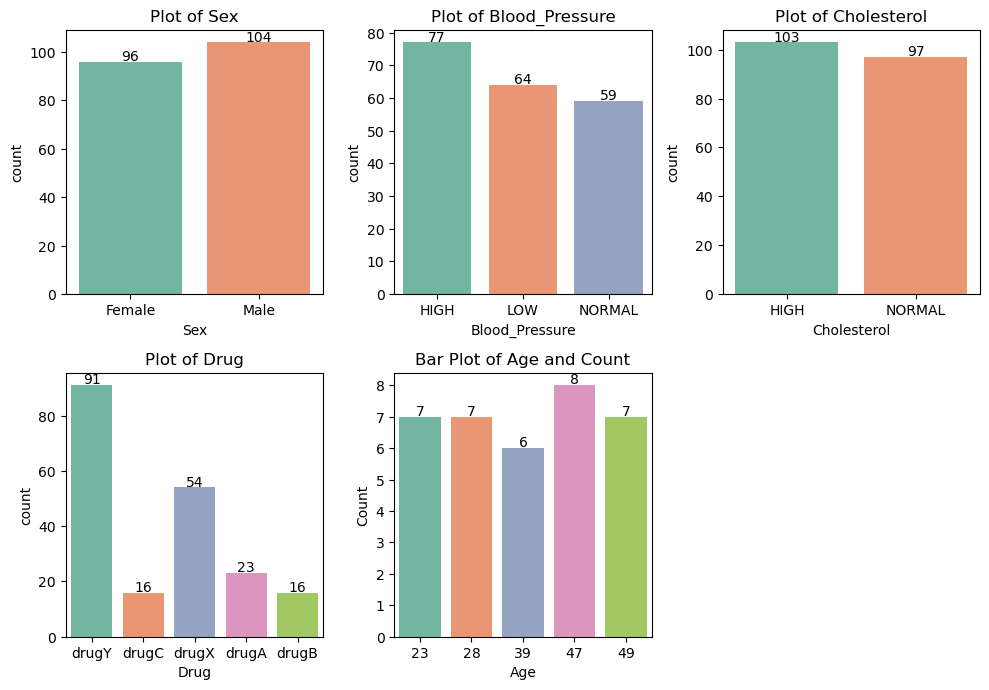

In [30]:
# EDA
def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'):
    if plot_type == 'count':
        sns.countplot(x=x, data=data, palette=palette, ax=ax)
    elif plot_type == 'bar':
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)

    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline',
                    fontsize=10, color='black',
                    xytext=(0, 1),
                    textcoords='offset points')

# Create the figure and subplots
plt.figure(figsize=(10, 10))
plot_configs = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count'},
    {'x': 'Blood_Pressure', 'data': df, 'plot_type': 'count'},
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
    {'x': 'Drug', 'data': df, 'plot_type': 'count'},
    {'x': 'Age', 'y': 'Count', 'data': df_top_age, 'plot_type': 'bar'}
]

# Loop through plot configurations to create subplots
for i, config in enumerate(plot_configs):
    ax = plt.subplot(3, 3, i + 1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()


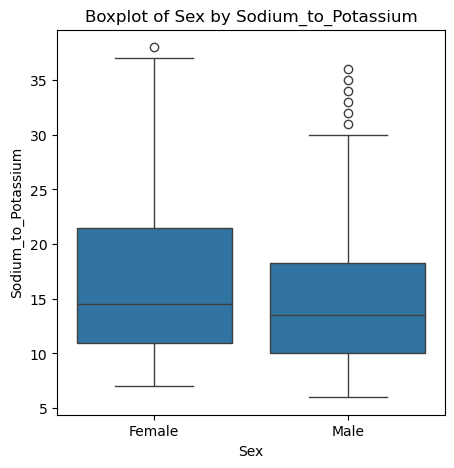

In [31]:
# Checking outliers detection through box plot
plt.figure(figsize=(5, 5))
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df)
plt.title('Boxplot of Sex by Sodium_to_Potassium')
plt.show()


In [54]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

X

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium
0,23,Female,HIGH,HIGH,25
1,47,Male,LOW,HIGH,13
2,47,Male,LOW,HIGH,10
3,28,Female,NORMAL,HIGH,8
4,61,Female,LOW,HIGH,18
...,...,...,...,...,...
195,56,Female,LOW,HIGH,12
196,16,Male,LOW,HIGH,12
197,52,Male,NORMAL,HIGH,10
198,23,Male,NORMAL,NORMAL,14


In [59]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [68]:
# OneHotEncoder
onehot_encoder_sex = OneHotEncoder(sparse_output=False)
one_hot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))
X = pd.concat([X, one_hot_df], axis=1)
X = X.drop('Sex', axis=1)  # Drop the original categorical column

# LabelEncoder
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure'])
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])

# Show processed data
X


,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
0,23,0,0,25,1.0,0.0
1,47,1,0,13,0.0,1.0
2,47,1,0,10,0.0,1.0
3,28,2,0,8,1.0,0.0
4,61,1,0,18,1.0,0.0
...,...,...,...,...,...,...
195,56,1,0,12,1.0,0.0
196,16,1,0,12,0.0,1.0
197,52,2,0,10,0.0,1.0
198,23,2,1,14,0.0,1.0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [70]:
X_train

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
2,47,1,0,10,0.0,1.0
77,26,0,1,19,1.0,0.0
46,37,0,0,13,1.0,0.0
187,47,0,0,10,0.0,1.0
191,23,0,0,8,0.0,1.0
...,...,...,...,...,...,...
106,22,2,0,12,0.0,1.0
14,50,2,0,13,1.0,0.0
92,29,0,0,29,1.0,0.0
179,67,2,0,16,1.0,0.0


In [71]:
X_test

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
95,36,1,1,11,0.0,1.0
15,16,0,1,16,1.0,0.0
30,18,2,1,9,1.0,0.0
158,59,1,0,10,1.0,0.0
128,47,1,1,34,0.0,1.0
...,...,...,...,...,...,...
113,65,1,1,14,1.0,0.0
26,31,0,0,30,0.0,1.0
139,69,2,0,10,1.0,0.0
100,31,0,1,12,0.0,1.0


In [72]:
dtc= DecisionTreeClassifier(criterion="entropy", max_depth=6, max_leaf_nodes=10)

In [73]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [74]:
dtc.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

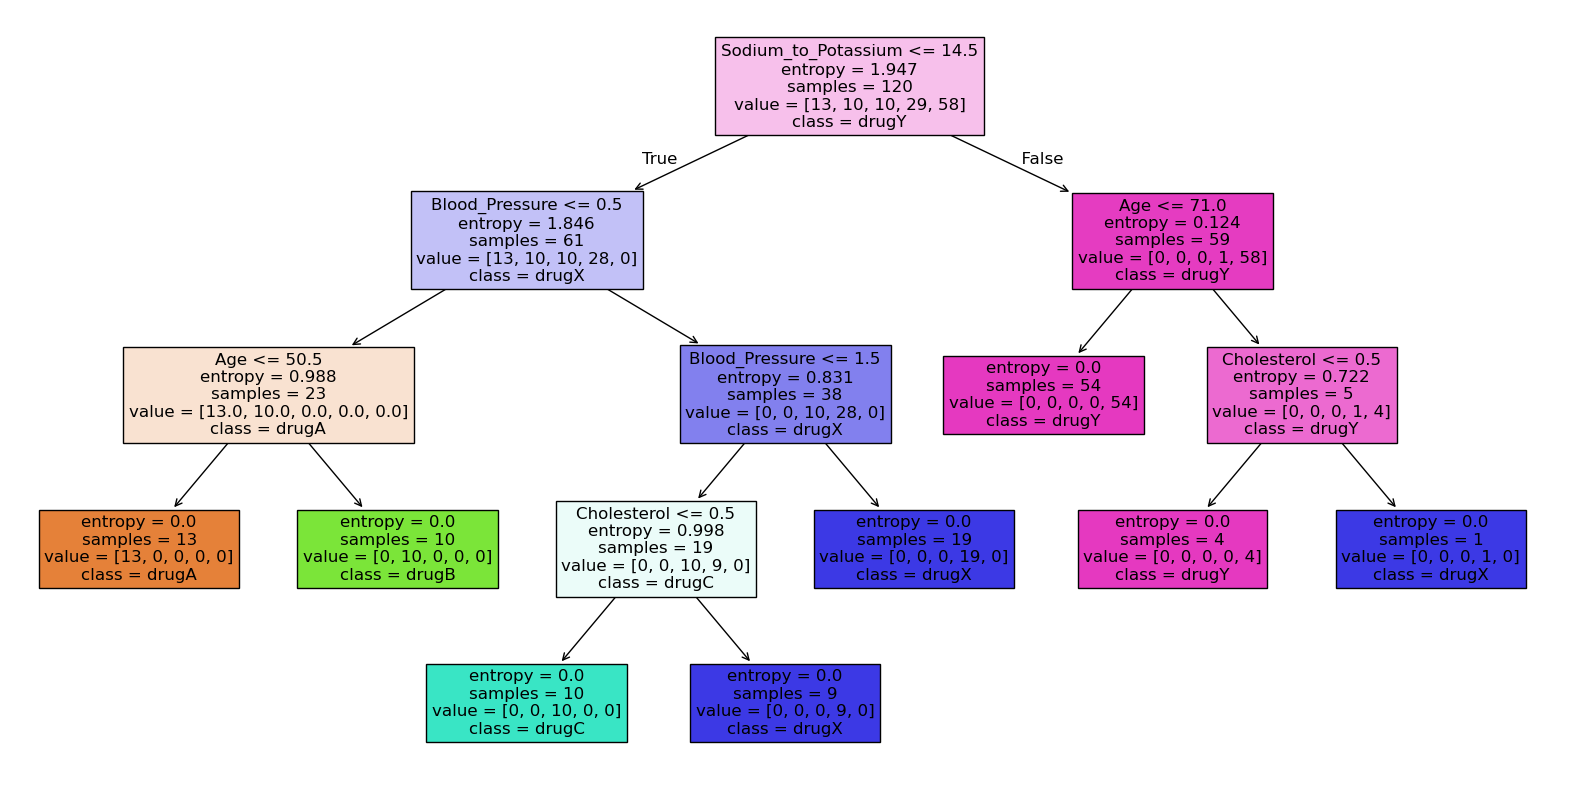

In [75]:
from sklearn.tree import plot_tree

# Extracting the feature column names from training data
feature_cols = X_train.columns

# Visualizing the decision tree
plt.figure(figsize=(20,10))
plot_tree(
    dtc,
    class_names=dtc.classes_,
    feature_names=feature_cols,
    fontsize=12,
    filled=True
)
plt.show()


In [91]:
import numpy as np

# Hàm tính entropy
def entropy(y):
    """Tính entropy của một tập dữ liệu y."""
    _, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

# Hàm phân tách dữ liệu dựa trên một thuộc tính cho trước
def split_indices(X, feature_name, threshold=None):
    """
    Chia dữ liệu thành hai nhóm dựa trên giá trị của feature_name.
    - Nếu là giá trị số, chia theo threshold (mặc định là giá trị trung vị).
    - Nếu là giá trị phân loại, chia theo 2 nhóm: nhóm có giá trị đó và nhóm không có.
    """
    if X[feature_name].dtype == 'O':  # Nếu là biến phân loại
        values = X[feature_name].unique()
        left_indices = X[X[feature_name] == values[0]].index.tolist()
        right_indices = X[X[feature_name] != values[0]].index.tolist()
    else:  # Nếu là số
        if threshold is None:
            threshold = X[feature_name].median()
        left_indices = X[X[feature_name] <= threshold].index.tolist()
        right_indices = X[X[feature_name] > threshold].index.tolist()
    
    return left_indices, right_indices

# Hàm tính entropy có trọng số
def weighted_entropy(X, y, left_indices, right_indices):
    """
    Tính entropy có trọng số sau khi phân tách dữ liệu.
    """
    w_left = len(left_indices) / len(X)
    w_right = len(right_indices) / len(X)

    if len(left_indices) == 0 or len(right_indices) == 0:
        return 0  # Tránh lỗi chia cho 0

    entropy_left = entropy(y.iloc[left_indices])
    entropy_right = entropy(y.iloc[right_indices])

    return w_left * entropy_left + w_right * entropy_right

# Hàm tính Information Gain (IG)
def information_gain(X, y, feature_name):
    """
    Tính Information Gain của một thuộc tính trong dữ liệu.
    """
    # Entropy ban đầu trước khi phân tách
    entropy_before = entropy(y)

    # Chia dữ liệu theo thuộc tính
    left_indices, right_indices = split_indices(X, feature_name)

    # Entropy có trọng số sau khi phân tách
    entropy_after = weighted_entropy(X, y, left_indices, right_indices)

    # Information Gain
    return entropy_before - entropy_after


# Chia dữ liệu dựa trên cột 'Age'
left_indices, right_indices = split_indices(df.drop(columns=['Drug']), 'Age')

# Tính entropy có trọng số
we_age = weighted_entropy(df.drop(columns=['Drug']), df['Drug'], left_indices, right_indices)
print(f'WE : {we_age}')
# Áp dụng tính IG cho cột 'Age'
ig_age = information_gain(df.drop(columns=['Drug']), df['Drug'], 'Age')
print(f'IG : {ig_age}')





WE : 1.8569109392844072
IG : 0.11186943866921784


In [77]:
# Accuracy Score
# Predict the response for the test dataset
y_test_pred = dtc.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", 100 * metrics.accuracy_score(y_test, y_test_pred))


Accuracy: 98.75


In [85]:
# Create Confusion Matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
cf_matrix


array([[10,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  1, 32]], dtype=int64)

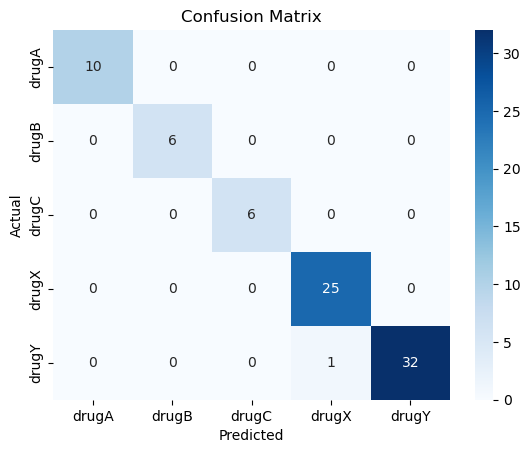

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [89]:
# Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(accuracy)

# Precision
precision = precision_score(y_test, y_test_pred, average=None)
print(precision)

# Recall
recall = recall_score(y_test, y_test_pred, average=None)
print(recall)

# F1 Score
f1 = f1_score(y_test, y_test_pred, average=None)
print(f1)

# F0.5 Score
f0_5 = fbeta_score(y_test, y_test_pred, beta=0.5, average=None)
print(f0_5)

# F2 Score
f2 = fbeta_score(y_test, y_test_pred, beta=2, average=None)
print(f2)



0.9875
[1.         1.         1.         0.96153846 1.        ]
[1.         1.         1.         1.         0.96969697]
[1.         1.         1.         0.98039216 0.98461538]
[1.         1.         1.         0.96899225 0.99378882]
[1.         1.         1.         0.99206349 0.97560976]


In [92]:
# Micro Precision
micro_precision = precision_score(y_test, y_test_pred, average='micro')
print(micro_precision)


0.9875


In [93]:
# Macro Precision
micro_precision = precision_score(y_test, y_test_pred, average='macro')
print(micro_precision)


0.9923076923076923


In [94]:
from sklearn.metrics import classification_report

target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

print(classification_report(y_test, y_test_pred, target_names=target_names))


              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       0.96      1.00      0.98        25
       drugY       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [96]:
# Prediction
age = 32
blood = 'HIGH'
blood_scaled = labelled_encoder_blood_pressure.transform([blood])

cholesterol = 'NORMAL'
cholesterol_scaled = labelled_encoder_cholesterol.transform([cholesterol])

Sodium_to_Potassium = 13

sex = 'Female'
sex_scaled = onehot_encoder_sex.transform([[sex]])

sex_scaled = sex_scaled.flatten()

# Creating Feature Sample for Prediction
feature_sample = np.array([age, blood_scaled[0], cholesterol_scaled[0], Sodium_to_Potassium, sex_scaled[0],sex_scaled[1] ])

# Making a Prediction
y_sample_pred = dtc.predict([feature_sample])

# Display the Prediction
y_sample_pred


d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugA'], dtype=object)

In [ ]:
# Sử dụng Grid Search dựa trên các siêu tham số trong mô hình như sau: 
# max_depth chạy từ 2 đến 10 
# và max_leaf_nodes chạy từ 2 đến 10. 
# Sau đó, vẽ biểu đồ thể hiện sự thay đổi của độ đo accuracy trên tập train và test 
# Từ đó đưa đến kết luận với siêu tham số điều chỉnh nào thì mô hình tốt nhất. 

In [ ]:
#  Giả sử drugx là một loại thuốc đặc trị có tác dụng rất mạnh không tốt cho bệnh nhân (hạn chế sử dụng) 
# tức là bệnh rất nghiêm trọng mới cần sử dụng. 
# Hãy đánh giá các giá trị bên dưới trên nhóm phân lớp drugx và 
# cho biết ta cần tối ưu giá trị nào khi cải thiện mô hình có điều kiện là hạn chế cấp thuốc drugX?

In [5]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import CategoricalNB

# Dữ liệu bài toán
data = {
    'Height': ['No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes'],
    'Eye Color': ['Blue', 'Brown', 'Blue', 'Blue', 'Brown', 'Blue', 'Brown', 'Blue'],
    'Hair Length': ['Short', 'Long', 'Long', 'Long', 'Short', 'Long', 'Short', 'Long'],
    'Gender': ['Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male']
}

# Chuyển đổi dữ liệu thành DataFrame
df = pd.DataFrame(data)

# Chuyển đổi dữ liệu phân loại thành số
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# Tạo mô hình Naive Bayes với Laplace Smoothing
X = df_encoded[['Height', 'Eye Color', 'Hair Length']]
y = df_encoded['Gender']
model = CategoricalNB(alpha=1)  # Laplace Smoothing (alpha=1)
model.fit(X, y)

# Dữ liệu cần dự đoán
new_data = pd.DataFrame({'Height': ['Yes'], 'Eye Color': ['Brown'], 'Hair Length': ['Short']})
new_data_encoded = new_data.apply(lambda x: pd.factorize(df[x.name])[0][df[x.name].isin(x)][0])

# Dự đoán
y_pred = model.predict(new_data_encoded.values.reshape(1, -1))
gender_pred = df['Gender'].unique()[y_pred[0]]
print("Dự đoán giới tính:", gender_pred)
# In ra xác suất của từng giới tính
probs = model.predict_proba(new_data_encoded.values.reshape(1, -1))
print("Xác suất Male:", probs[0][0])
print("Xác suất Female:", probs[0][1])


Dự đoán giới tính: Male
Xác suất Male: 0.9615384615384615
Xác suất Female: 0.03846153846153848


d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
